# Artificial and Computational Intelligence Assignment 1

## Problem solving by Uninformed & Informed Search

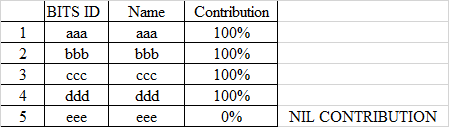



| Sl. No. | BITS ID | Name  | Contribution |
|---------|---------|-------|--------------|
| 1 | 2025AE05126 | VATSAVAYI KAUSHIK CHANDRA VARMA  | 100% |
| 2 | 2025AE05127 | MISHRA RAHUL VIJAYKUMAR AMLESH   | 100% |
| 3 | 2025AE05128 | CHINMAYA KUMAR PANDA             | 100% |
| 4 | 2025AE05129 | ANMOL SINHA                      | 100% |
| 5 | 2025AE05130 | KANKATALA SANDEEP NARAYANA       | 100% |

List all the team members BITS ID ,Name along with % of contribution in this assignment: sample Provided below:

1. &nbsp; 2025AE05126 &nbsp; | &nbsp; VATSAVAYI KAUSHIK CHANDRA VARMA  &nbsp; | &nbsp; 100% &nbsp; | &nbsp;
2. &nbsp; 2025AE05127 &nbsp; | &nbsp; MISHRA RAHUL VIJAYKUMAR AMLESH   &nbsp; | &nbsp; 100% &nbsp; | &nbsp;
3. &nbsp; 2025AE05128 &nbsp; | &nbsp; CHINMAYA KUMAR PANDA             &nbsp; | &nbsp; 100% &nbsp; | &nbsp;
4. &nbsp; 2025AE05129 &nbsp; | &nbsp; ANMOL SINHA                      &nbsp; | &nbsp; 100% &nbsp; | &nbsp;
5. &nbsp; 2025AE05130 &nbsp; | &nbsp; KANKATALA SANDEEP NARAYANA       &nbsp; | &nbsp; 100% &nbsp; | &nbsp;

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

## PEAS for GPS Navigation Agent
 
1. **Performance Measure**: The agent's performance is judged by its ability to find the shortest, quickest, and safest path from Alan's house to the park, avoiding road blockades and restricted areas, and reaching the destination on time.
 
2. **Environment**: The environment is a city grid map with landmarks, blocked roads, usable paths, and a defined start and goal position (Alan's house and the park). The agent navigates only on empty cells, can move adjacent (but not through) obstacles, and prohibits diagonal movement.
 
3. **Actuators**: The agent's actuators allow movement actions (up, down, left, right) on the grid. Each move transitions the agent to an adjacent, legally accessible cell.
 
4. **Sensors**: The agent's sensors detect its current position, identify blocked cells, landmark locations, and confirm the legality of each potential action in its local environment.

<hr/>

Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below

In [1]:
! pip install networkx matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#Code Block : Set Initial State (Must handle dynamic inputs)

def input_initial_states():
    s =  tuple(map(int,input("Enter starting point coordinates : ").strip("[()]").replace(',','').replace(' ','')))
    g =  tuple(map(int,input("Enter goal target coordinates : ").strip("[()]").replace(',','').replace(' ','')))
    return s,g

# Testing a random sample of inputs
start,goal = input_initial_states()

In [ ]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)

''' Code starts below '''
rows, cols = 6, 6
maze_path = [['-'] * cols for _ in range(rows)]
# Symbol '*' represents construction
# Letter 'T' represents temple
# Symbol '-' represents navigable path

maze_path[start[0]][start[1]] = 'S'
maze_path[goal[0]][goal[1]] = 'G'

def dimension_matching(matrix,row_s,col_s):
    check_flag = True
    if len(matrix)!=row_s:
        check_flag = False
        
    for i in range(len(matrix)):
        if len(matrix[i])!=col_s:
            check_flag = False
    return check_flag

print("Size of Grid = ",len(maze_path),'x',len(maze_path[0]))
path_cost_input = int(input("Enter path cost for traversal from starting point: "))
print("Test grid sample: ")
maze_path

In [ ]:
#Code Block : Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented

''' Code starts below '''
import copy
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Right, Left, Down, Up

def generate_adjacency_list(grid):
    rows = len(grid)
    cols = len(grid[0])
    adjacency_list = {}

    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 0:
                node = (r, c)
                adjacency_list[str(node).replace(' ','')] = []
                for dr, dc in directions:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == 0:
                        adjacency_list[str(node).replace(' ','')].append((str((nr, nc)).replace(' ',''),path_cost_input))

    return adjacency_list

# Here 1 denotes blockades and 0 denotes traversable paths
def generate_binary_grid(matrix):
    bool_matrix = copy.deepcopy(matrix)
    for i in range(len(bool_matrix)):
        for j in range(len(bool_matrix[i])):
            bool_matrix[i][j] = 1 if (bool_matrix[i][j]=='*' or bool_matrix[i][j]=='T') else 0
    return bool_matrix

input_grid = generate_binary_grid(maze_path)

print("\n Testing Adjacency List :")
Graph_nodes = generate_adjacency_list(input_grid)
for node, neighbors in Graph_nodes.items():
    print(f"{node} : {neighbors},")
    
input_grid

In [ ]:
#Code block : Write function to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented

''' Code starts below '''
def heuristic(node_coordinates: str) -> int:
    # We will use mahattan distance as heuristic
    coordinates = tuple(map(int, node_coordinates.strip("[()]").replace(',','').replace(' ','')))
    manhattan_distance = abs(goal[0]- coordinates[0]) + abs(goal[1]- coordinates[1])
    return manhattan_distance

def goal_test(adj_list,verbose=False):
    for i in range(len(maze_path)):
        for j in range(len(maze_path[i])):
            if maze_path[i][j]=='G':
                goal_tuple = (i,j)
    if verbose:
        print(goal_tuple)
    return str(goal).replace(' ','') in adj_list and adj_list[str(goal).replace(' ','')] != [] and heuristic(str(goal).replace(' ','')) == 0 and goal_tuple == goal

print("Relevant path to goal exists : ", goal_test(Graph_nodes))

### 2.	Definition of Algorithm 1 (Breadth First Search)

In [ ]:
#Code Block : Function for algorithm 1 implementation

''' Code starts below '''
#Solution using data structures
from collections import deque

def is_valid_move(grid, x, y):
    return 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] == 0

def bfs(grid, start, goal):
    queue = deque([start])
    visited = set([start])
    came_from = {start: None}
    nodes_expanded = 0

    while queue:
        current = queue.popleft()
        if current == goal:
            # Reconstruct path
            path = []
            while current is not None:
                path.append(current)
                current = came_from[current]
            return path[::-1], nodes_expanded

        for dx, dy in directions:
            nx, ny = current[0] + dx, current[1] + dy
            neighbor = (nx, ny)
            if is_valid_move(grid, nx, ny) and neighbor not in visited:
                visited.add(neighbor)
                came_from[neighbor] = current
                queue.append(neighbor)

    return None, nodes_expanded

# Run the function
path, expanded = bfs(input_grid, start, goal)
print("Shortest Path:", path)
print("Path Cost:", len(path)-1)

### 3.	Definition of Algorithm 2 (Recursive Best First Search [Variation of A* Search])

In [ ]:
#Code Block : Function for algorithm 2 implementation
def RBFS_Anim(start_node, stop_node, verbose=False):
    
    open_set = set([start_node])
    closed_set = set()
    g = {}
    h = {}
    parents = {}
    
    g[start_node] = 0
    h[start_node] = heuristic(start_node)
    parents[start_node] = start_node
    
    # Initialize animation data
    animation_data = {
        'open_sets': [],
        'closed_sets': [],
        'current_nodes': [],
        'parents_maps': [],
        'path_costs': [],
        'heuristic_costs': [],
        'f_limits_alter_costs': []
    }

    
    def rbfs_recursive(current_node, f_limit_2nd, open_set, closed_set, depth=0):
        
        # Store current state for animation
        animation_data['open_sets'].append(open_set.copy())
        animation_data['closed_sets'].append(closed_set.copy())
        animation_data['current_nodes'].append(current_node)
        animation_data['parents_maps'].append(parents.copy())
        animation_data['path_costs'].append(g.copy())
        animation_data['heuristic_costs'].append(h.copy())
        animation_data['f_limits_alter_costs'].append(f_limit_2nd)

        if verbose:
            print(f"RBFS Depth {depth}: Node {current_node}, f-limit (2nd alter): {f_limit_2nd}")
        
        if current_node == stop_node:
            # Reconstruct path
            path = []
            temp_node = current_node
            while parents[temp_node] != temp_node:
                path.append(temp_node)
                temp_node = parents[temp_node]
            path.append(temp_node)
            path.reverse()
            if verbose:
                print(f'Path found against the defined closed frontier list : {closed_set}, for child:parent defined {parents}.')
            return path, g[current_node]
        
        # Generate successors
        successors = []
        if current_node in Graph_nodes:
            for (next_node, weight) in Graph_nodes[current_node]:
                if next_node not in closed_set:
                    g_new = g[current_node] + weight
                    f_new = g_new + heuristic(next_node)
                    successors.append((g[current_node] + heuristic(next_node) + weight, g[current_node] + weight, next_node))
                    
                    if next_node not in open_set:
                        open_set.add(next_node)
                        parents[next_node] = current_node
                        g[next_node] = g[current_node] + weight
                        h[next_node] = heuristic(next_node)
                    else:
                        if g_new < g[next_node]:
                            g[next_node] = g[current_node] + weight
                            h[next_node] = heuristic(next_node)
                            parents[next_node] = current_node
        
        if not successors:
            return None, float('inf')
        
        # Sort successors by f-value
        successors.sort(key=lambda x: x[0])
        
        while successors:
            best_f, best_g, best_node = successors[0]
            
            # Store state before recursive call
            animation_data['open_sets'].append(open_set.copy())
            animation_data['closed_sets'].append(closed_set.copy())
            animation_data['current_nodes'].append(current_node)
            animation_data['parents_maps'].append(parents.copy())
            animation_data['path_costs'].append(g.copy())
            animation_data['heuristic_costs'].append(h.copy())
            animation_data['f_limits_alter_costs'].append(f_limit_2nd)
            
            if best_f > f_limit_2nd:
                return None, best_f
            
            # Get alternative f-value for 2nd best alternative for cost comparison
            alternative_f = successors[1][0] if len(successors) > 1 else float('inf')
            
            # Update sets for recursion
            open_set.remove(best_node)
            closed_set.add(best_node)
            
            # Recursive call - (may by optimized using Bottom-Up Dynamic Programming logics via a memoization array)
            result, result_f = rbfs_recursive(best_node, min(f_limit_2nd, alternative_f), open_set, closed_set, depth + 1)
            
            # Store state after recursive call
            animation_data['open_sets'].append(open_set.copy())
            animation_data['closed_sets'].append(closed_set.copy())
            animation_data['current_nodes'].append(current_node)
            animation_data['parents_maps'].append(parents.copy())
            animation_data['path_costs'].append(g.copy())
            animation_data['heuristic_costs'].append(h.copy())
            animation_data['f_limits_alter_costs'].append(f_limit_2nd)
            
            if result is not None:
                return result, result_f
            
            # Backtrack
            closed_set.remove(best_node)
            open_set.add(best_node)
            
            # Update f-value and re-sort
            successors[0] = (result_f, g[best_node], best_node)
            successors.sort(key=lambda x: x[0])
            
            # Update g value
            g[best_node] = result_f - heuristic(best_node)
        
        return None, float('inf')
    
    # Initialize sets for RBFS
    open_set = set([start_node])
    closed_set = set()
    
    # Start RBFS
    path, cost = rbfs_recursive(start_node, float('inf'), open_set, closed_set)
    
    if path:
        if verbose:
            print('Path found via RBFS: {}'.format(path))
            print('Total cost: {}'.format(cost))
        return path, animation_data
    else:
        print('Path does not exist!')
        return None, animation_data

path,anims = RBFS_Anim(str(start).replace(" ",''), str(goal).replace(" ",''),True)

### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [ ]:
#Code Block : Function & call to get inputs (start/end state)

start,goal = input_initial_states()

print("\nStarting point (Home) co-ordinates :",start)
print("Goal point (Park) co-ordinates :",goal)

print("\nRepresentation :\n# Symbol '*' represents construction - blockade.\n# Letter 'T' represents temple - blockade\n# Symbol '-' represents navigable path (assumed path cost=1)\n# Letter 'S' represents Starting Point(Home)\n# Letter 'G' represents Goal point\n")
rows,cols = int(input("Enter number of rows in grid:")),int(input("Enter number of columns in grid:"))
print()
for i in range(rows):
    maze_path[i] = input(f"Enter the row values for grid-{i} paths as per format (comma[,] separated) :").split(',')

if dimension_matching(maze_path,rows,cols) == False:
    raise Exception("\nInputted task environment for paths does not match defined dimensions (rows x columns).")


maze_path

In [ ]:
input_grid = generate_binary_grid(maze_path)

print("\nAdjacency List : ")
Graph_nodes = generate_adjacency_list(input_grid)
for node, neighbors in Graph_nodes.items():
    print(f"{node} : {neighbors},")


if goal_test(Graph_nodes) == False:
    raise Exception("\nInputted goal does not match task environment's definition")

print("\nRepresentation : Here 0 represents traversable paths while 1 represents blocked roads.")
input_grid

### 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

In [ ]:
# Run the function
path, expanded = bfs(input_grid, start, goal)
print("Shortest Path:", path)
print("Path Cost:", len(path)-1)

In [ ]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))
# Solution using networkx for plots of graph maze visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation, PillowWriter
import networkx as nx

# Check if a cell is walkable
def is_walkable(cell):
    return cell == '-' or cell == 'S' or cell == 'G'

# Build graph from grid
def build_graph(grid):
    G = nx.Graph()
    rows, cols = len(grid), len(grid[0])

    for x in range(rows):
        for y in range(cols):
            if is_walkable(grid[x][y]):
                G.add_node((x, y))
                for dx, dy in directions:
                    nx_, ny_ = x + dx, y + dy
                    if 0 <= nx_ < rows and 0 <= ny_ < cols and is_walkable(grid[nx_][ny_]):
                        G.add_edge((x, y), (nx_, ny_))
    return G

# Build graph (assuming 'grid', 'start', and 'goal' are defined)
G = build_graph(maze_path)

# Get shortest path
if start in G and goal in G:
    try:
        path = nx.shortest_path(G, source=start, target=goal)
        print("Shortest Path:", path)
        print("Path Cost:", len(path)-1)
    except nx.NetworkXNoPath:
        path = []
else:
    path = []

# Visualization
fig, (txt, ax) = plt.subplots(
    1, 2,
    figsize=(10, 6),
    gridspec_kw={'width_ratios': [1, 6]}  # <-- 1:6 width ratio
)

txt.axis("off")
txt.text(
    0.02, 0.98,
    'S : Start\nG : Goal (Park)\n\nBlockades :-\n* C : Construction\n* T : Temple\n',
    transform=txt.transAxes,
    verticalalignment='top',
    fontname="Segoe UI Emoji",
    bbox=dict(boxstyle='round', alpha=0.5, facecolor='white', edgecolor='black')
)

rows, cols = len(maze_path), len(maze_path[0])
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_xticks([i for i in range(cols)])
ax.set_yticks([i for i in range(rows)])
ax.grid(True, which='major', color='gray', linewidth=0.5)

# Place tick labels at cell centers
ax.set_xticks([i+0.5 for i in range(rows)], minor=True)
ax.set_yticks([i+0.5 for i in range(cols)], minor=True)
ax.set_xticklabels([str(i) for i in range(cols)], minor=True)
ax.set_yticklabels([str(i) for i in range(rows)], minor=True)

# Only show minor ticks (cell centers)
ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.tick_params(which='minor', bottom=True, left=True, labelbottom=True, labelleft=True)
ax.set_aspect('equal')
ax.invert_yaxis()

# Draw static elements (obstacles, temple, start, goal)
for x in range(rows):
    for y in range(cols):
        val = maze_path[x][y]
        if val == '*':
            rect = patches.Rectangle((y, x), 1, 1, facecolor='red')
            ax.add_patch(rect)
            ax.text(y + 0.5, x + 0.5, 'C', color='yellow', fontsize=14, ha='center', va='center')
        elif val == 'T':
            rect = patches.Rectangle((y, x), 1, 1, facecolor='maroon')
            ax.add_patch(rect)
            ax.text(y + 0.5, x + 0.5, 'T', color='violet', fontsize=14, ha='center', va='center')
        elif (x, y) == start:
            ax.text(y + 0.5, x + 0.5, 'S', color='brown',
                    fontsize=14, ha='center', va='center')
        elif (x, y) == goal:
            ax.text(y + 0.5, x + 0.5, 'G', color='black',
                    fontsize=14, ha='center', va='center')

# Highlight path cells (static background highlight)
for (x, y) in path:
    rect = patches.Rectangle((y, x), 1, 1, facecolor='green', alpha=0.3)
    ax.add_patch(rect)

# Initialize path line and current marker
path_line, = ax.plot([], [], 'o-', color='CornflowerBlue', lw=4, markersize=10)
current_marker, = ax.plot([], [], 'o', color='magenta', markersize=12)

def update(i):
    if i == 0 or not path:
        path_line.set_data([], [])
        current_marker.set_data([], [])
        return path_line, current_marker

    coords = path[:i]
    x_vals = [y + 0.5 for (x, y) in coords]
    y_vals = [x + 0.5 for (x, y) in coords]
    path_line.set_data(x_vals, y_vals)

    # Highlight current node in animation - FIXED: use lists instead of single values
    cx, cy = coords[-1]
    current_marker.set_data([cy + 0.5], [cx + 0.5])  # Wrap in lists

    return path_line, current_marker

# Animate only if path exists
frames = len(path) + 1 if path else 1

ani = FuncAnimation(fig, update, frames=frames, interval=500, blit=True, repeat=False)
try:
    ani.save('bfs_tree_maze_animation.gif', writer=PillowWriter(fps=2))
    print("Breadth First Search Animation saved as 'bfs_tree_maze_animation.gif'")
except Exception as e:
    print(f"Could not save GIF: {e}")

plt.title("Shortest Path Animation (BFS)")
# plt.show()

<hr/>

![BFS_tree_maze_animation_path](bfs_tree_maze_animation.gif)

In [ ]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))
rbfs_path,rbfs_stats_data = RBFS_Anim(str(start).replace(" ",''), str(goal).replace(" ",''))
print("Shortest path to goal : ",path)
print("Open Set (Evaluated set) : ", rbfs_stats_data['open_sets'], "\nTotal Steps = ",len(rbfs_stats_data['open_sets']))
print("\nClosed List (Frontier set): ", rbfs_stats_data['closed_sets'])
print("\nSubsequent parents to child maps/dictionary) step-wise: ", rbfs_stats_data['parents_maps'])
print("\nSubsequent path costs [g(n)] step-wise: ", rbfs_stats_data['path_costs'])
print("\nSubsequent heuristic costs [h(n))] step-wise: ", rbfs_stats_data['heuristic_costs'])
print("\nSubsequent total costs [f(n))] step-wise: ", [{k: md1[k] + md2[k] for k in md1.keys()}
                                                       for md1, md2 in zip(rbfs_stats_data['path_costs'], rbfs_stats_data['heuristic_costs'])])
print("\nSubsequent f_limits (2nd best alternative) costs step-wise: ", rbfs_stats_data['f_limits_alter_costs'])

In [ ]:
def animate_RBFS_search(animation_data, final_path=None):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    plt.subplots_adjust(wspace=0.3)
    
    # Create the complete graph for reference
    complete_G = nx.Graph()
    for node, neighbors in Graph_nodes.items():
        for neighbor, weight in neighbors:
            complete_G.add_edge(node, neighbor, weight=weight)
    
    # Precompute positions for consistent layout
    all_nodes = set()
    for parents_map in animation_data['parents_maps']:
        all_nodes.update(parents_map.keys())

    # Use spring layout with fixed seed for consistent positioning
    pos = nx.spring_layout(complete_G,
        k=max(1.0, 1.5 * (1 / len(complete_G.nodes())**0.5)),                    # Optimal distance between nodes
        iterations=200,         # More iterations for better layout
        threshold=1e-4,         # Lower threshold for convergence
        scale=1.5,                # Scale factor for positions
        center=(0, 0),          # Center of layout
        seed=42                 # For reproducible results)
        )

    
    def update(frame):
        ax1.clear()
        ax2.clear()
        
        if frame >= len(animation_data['open_sets']):
            return
        
        # Current state
        open_set = animation_data['open_sets'][frame]
        closed_set = animation_data['closed_sets'][frame]
        current_node = animation_data['current_nodes'][frame]
        parents = animation_data['parents_maps'][frame]
        path_costs = animation_data['path_costs'][frame]
        heuristic_costs = animation_data['heuristic_costs'][frame]
        f_limit_2nd = animation_data['f_limits_alter_costs'][frame]
        
        # Plot 1: Current search tree based on parents
        G = nx.DiGraph()
        all_nodes = set(parents.keys())
        for current_node in all_nodes:
            G.add_node(current_node)
        
        for child, parent in parents.items():
            if child != parent:
                weight = 0
                if parent in Graph_nodes:
                    for neighbor, w in Graph_nodes[parent]:
                        if neighbor == child:
                            weight = w
                            break
                G.add_edge(parent, child, weight=weight)
        
        # Node colors
        node_colors = []
        node_labels = {}
        for node in G.nodes():
            if node == current_node:
                node_colors.append('yellow')  
                #node_labels[node] = f"\nnode_labels[node] = f'\tg:{g_val}\th:{h_val}\tf:{f_val}'"
            elif node in open_set:
                node_colors.append('lightgreen')  # Open set
                #node_labels[node] = f"{node}\nOPEN"
            elif node in closed_set:
                node_colors.append('lightcoral')  # Closed set
                #node_labels[node] = f"{node}\nCLOSED"
            else:
                node_colors.append('lightblue')  # Unexplored
                #node_labels[node] = node
        
        # Draw graph
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, ax=ax1)
        nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20, ax=ax1)
        nx.draw_networkx_labels(G, pos, ax=ax1)
        
        # Use custom labels for better readability
        nx.draw_networkx_labels(G, pos, labels=None, ax=ax1)
        
        # Edge labels (weights)
        edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)
        
        ax1.set_title(f'RBFS Step {frame+1}\nCurrent: {current_node}, F-limit(2nd alter): {f_limit_2nd}')
        ax1.set_xlim(-1.5, 1.5)
        ax1.set_ylim(-1.5, 1.5)
        
        # Plot 2: Complete graph with status and costs

        # pos = nx.spectral_layout()
        
        complete_colors = []
        for node in complete_G.nodes():
            if node == current_node:
                complete_colors.append('yellow')
            elif node in open_set:
                complete_colors.append('lightgreen')
            elif node in closed_set:
                complete_colors.append('lightcoral')
            else:
                complete_colors.append('lightblue')
        
        nx.draw_networkx_nodes(complete_G, pos, node_color=complete_colors, node_size=800, ax=ax2)
        nx.draw_networkx_edges(complete_G, pos, ax=ax2)
        nx.draw_networkx_labels(complete_G, pos, ax=ax2)
        
        # Add detailed node labels with costs
        node_labels = {}
        for node in complete_G.nodes():
            g_val = path_costs.get(node, 'Infinity')
            h_val = heuristic(node)
            f_val = g_val + h_val if isinstance(g_val, (int, float)) else 'Infinity'
            node_labels[node] = f'g:{g_val} | h:{h_val} | f:{f_val}'
        
        label_pos = {k: (v[0], v[1] + 0.1) for k, v in pos.items()}
        nx.draw_networkx_labels(complete_G, label_pos, labels=node_labels, ax=ax2)
        
        # Highlight final path
        if final_path and frame == len(animation_data['open_sets']) - 1:
            path_edges = [(final_path[i], final_path[i+1]) for i in range(len(final_path)-1)]
            nx.draw_networkx_edges(complete_G, pos, edgelist=path_edges, edge_color='red', width=3, ax=ax2)
        
        # Edge weights
        edge_labels = {}
        for u,v in complete_G.edges():
            weight = next((magnitude for node, magnitude in Graph_nodes[u] if node == v), 0)
            edge_labels[(u,v)] = f'w:{weight}'
        
        nx.draw_networkx_edge_labels(complete_G, pos, edge_labels=edge_labels, ax=ax2)
        
        ax2.set_title('Complete Graph with RBFS Costs')
        ax2.set_xlim(-1.5, 1.5)
        ax2.set_ylim(-1.5, 1.5)
        

        # ax1.text(0.02, 0.98, 'RBFS Legend:\n🟡 Current (Yellow)\n🟢 Open (Green)\n🔴 Closed (Red)\n🔵 Unexplored (Blue)', transform=ax1.transAxes, verticalalignment='top',fontname="Segoe UI Emoji", bbox=dict(boxstyle='round', alpha=0.5, facecolor='white', edgecolor='black'))
        labels = [
            ("Current (Yellow)", "yellow"),
            ("Open (Green)", "lightgreen"),
            ("Closed (Red)", "lightcoral"),
            ("Unexplored (Blue)", "lightblue")
        ]
        
        y = 0.95
        for label, color in labels:
            ax1.text(
            0.05, y, label,
            transform=ax1.transAxes,
            va="center", ha="left", fontsize=12
            )
            ax1.plot(
            0.02, y, "o", color=color, markersize=12,
            transform=ax1.transAxes, clip_on=False
            )
            y -= 0.07


    
    # Create animation
    anim = FuncAnimation(fig, update, frames=len(animation_data['open_sets']), interval=1500, repeat=False, blit=False)
    
    plt.tight_layout()
    
    # Save animation to prevent garbage collection
    try:
        anim.save('rbfs_animation.gif', writer=PillowWriter(fps=1))
        print("RBFS Animation saved as 'rbfs_animation.gif'")
    except Exception as e:
        print(f"Could not save GIF: {e}")
    
    plt.show()
    
    return anim

"""
Testing the execution of Graph Nodes algorithm
"""
# Run RBFS algorithm for node-wise animation graphs
print("Running Recursive Best-First Search (RBFS) Algorithm.")
final_path, animation_data = RBFS_Anim(str(start).replace(" ",''),str(goal).replace(" ",''))

if final_path:
    print(f"\nFinal Path: {final_path}")
    print(f"Total Cost: {animation_data['path_costs'][-1].get('(3,5)', 'N/A')}")
    print("Total Steps in total : ", len(animation_data['open_sets']))
    
    print("\nCreating RBFS animated and static step-wise visualization . . . ")
    anim = animate_RBFS_search(animation_data, final_path)    
else:
    print("No path found!")

<hr/>

![RBFS_Animation_graph](rbfs_animation.gif)

### 5.	Comparitive Analysis (Time and Space Complexity)

In [ ]:
import time
import tracemalloc

def find_auxiliary_space(func, *args, **kwargs):
    """Measure auxiliary space complexity of a function"""
    tracemalloc.start()
    snapshot1 = tracemalloc.take_snapshot()

    # Execute function
    def output():
        result = func(*args, **kwargs)

    output()
    
    snapshot2 = tracemalloc.take_snapshot()
    stats = snapshot2.compare_to(snapshot1, 'lineno')
    
    total_memory = sum(stat.size for stat in stats)
    tracemalloc.stop()
    
    return total_memory


def find_time_complexity(func, *args, **kwargs):
    """Measure time complexity of a function"""
    start_time = time.perf_counter()
    
    # Execute function
    result = func(*args, **kwargs)

    end_time = time.perf_counter()
    duration = end_time - start_time
    
    return duration

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 1
print(f"""Space_Complexity = {find_auxiliary_space(bfs,input_grid, start, goal)} bytes,
Time_Complexity = {find_time_complexity(bfs,input_grid, start, goal)} seconds""")

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 2
print(f"""Space_Complexity = {find_auxiliary_space(RBFS_Anim,str(start).replace(" ",''), str(goal).replace(" ",''))} bytes,
Time_Complexity = {find_time_complexity(RBFS_Anim,str(start).replace(" ",''), str(goal).replace(" ",''))} seconds""")

### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

Comparison : 
* We observe that the actual Time complexity of execution of the Breadth First Search is less than that of Recursive Best First Search.
* Here we also learn that the actual Space complexity of execution of the Breadth First Search is less than that of Recursive Best First Search.
* Hence although breadth-first search may be able to perform faster, but the possibility of finding an optimal path (due to lack of heuristic) and no backtracking may cause the consequence to be an inefficient and unoptimal outcome.